In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import unicodedata

In [4]:
# データの読み込み
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submit_sample = pd.read_csv('./submit_sample.csv', header=None)

In [5]:
train.head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
0,0,nashville,1949,bmw,excellent,6 cylinders,gas,115148,clean,manual,rwd,mid-size,convertible,orange,NaN,27587
1,1,state college,2013,toyota,fair,8 cylinders,gas,172038,clean,automatic,rwd,full-size,sedan,silver,pa,4724
2,2,wichita,1998,ford,good,6 cylinders,gas,152492,clean,automatic,fwd,full-size,SUV,silver,ks,10931
3,3,albany,2014,ford,excellent,4 cylinders,gas,104118,clean,manual,fwd,mid-size,SUV,blue,ny,16553
4,4,redding,2005,ford,excellent,6 cylinders,gas,144554,clean,manual,fwd,mid-size,sedan,red,ca,5158


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27532 entries, 0 to 27531
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27532 non-null  int64 
 1   region        27532 non-null  object
 2   year          27532 non-null  int64 
 3   manufacturer  27532 non-null  object
 4   condition     27532 non-null  object
 5   cylinders     27532 non-null  object
 6   fuel          26293 non-null  object
 7   odometer      27532 non-null  int64 
 8   title_status  27076 non-null  object
 9   transmission  27532 non-null  object
 10  drive         27532 non-null  object
 11  size          27532 non-null  object
 12  type          27076 non-null  object
 13  paint_color   27532 non-null  object
 14  state         24228 non-null  object
 15  price         27532 non-null  int64 
dtypes: int64(4), object(12)
memory usage: 3.4+ MB


In [10]:
# 基本統計量
train.describe(include='all')

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
count,27532.000000,27532,27532.000000,27532,27532,27532,26293,2.753200e+04,27076,27532,27532,27532,27076,27532,24228,27532.000000
unique,NaN,372,NaN,125,6,8,5,NaN,6,3,3,9,13,12,51,NaN
top,NaN,central NJ,NaN,ford,excellent,6 cylinders,gas,NaN,clean,automatic,fwd,full-size,sedan,black,ca,NaN
freq,NaN,1069,NaN,6166,15219,11504,23546,NaN,22365,20497,14602,14585,9259,10143,2702,NaN
mean,13765.500000,NaN,2007.832958,NaN,NaN,NaN,NaN,1.160199e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13468.724829
std,7947.948142,NaN,15.758976,NaN,NaN,NaN,NaN,6.451642e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10962.149840
min,0.000000,NaN,1921.000000,NaN,NaN,NaN,NaN,-1.318690e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1004.000000
25%,6882.750000,NaN,2005.000000,NaN,NaN,NaN,NaN,7.836775e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5759.000000
50%,13765.500000,NaN,2011.000000,NaN,NaN,NaN,NaN,1.114445e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9206.000000
75%,20648.250000,NaN,2014.000000,NaN,NaN,NaN,NaN,1.508562e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19128.000000


In [11]:
# 数量変数とカテゴリ変数の分離
col_categoric = ["region", "manufacturer", "condition", "cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "paint_color", "state"]
train_numeric = train.drop(col_categoric, axis=1)
train_categoric = train[col_categoric]

central NJ          1069
rhode island         712
rochester            522
albany               504
washington, DC       477
                    ... 
the thumb              1
ashtabula              1
hanford-corcoran       1
baton rouge            1
southwest KS           1
Name: region, Length: 372, dtype: int64


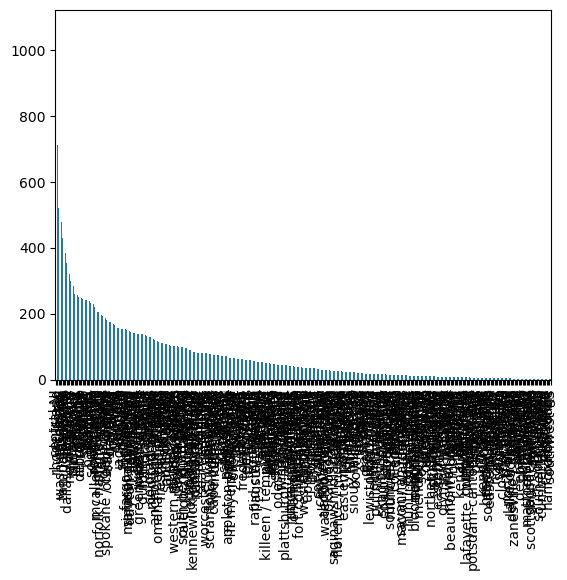

ford             6166
chevrolet        3339
bmw              2736
toyota           1570
honda            1526
                 ... 
SΑTURN              1
ＤＯＤＧＥ               1
ｉｎｆｉｎｉｔｉ            1
ｍｅｒｃｅｄｅｓ－ｂｅｎｚ       1
ᴄhrysler            1
Name: manufacturer, Length: 125, dtype: int64


c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65350 (\N{FULLWIDTH LATIN SMALL LETTER F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65359 (\N{FULLWIDTH LATIN SMALL LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65362 (\N{FULLWIDTH LATIN SMALL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65348 (\N{FULLWIDTH LATIN SMALL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65347 (\N{FULLWIDTH LATIN SMALL LETTER C}) missing from current font.
  fig.canvas

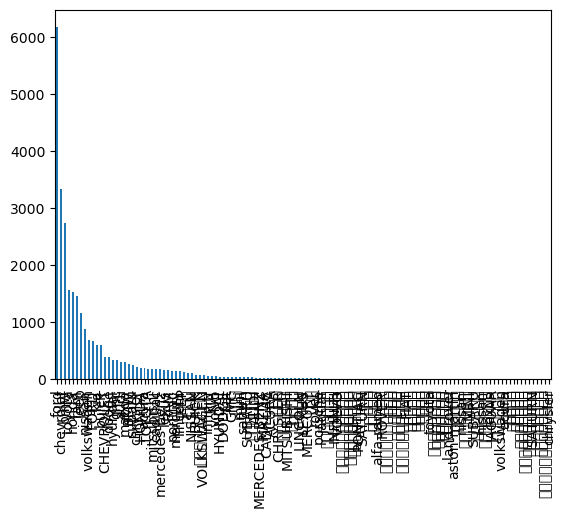

excellent    15219
good          6009
like new      3810
fair          2404
new             55
salvage         35
Name: condition, dtype: int64


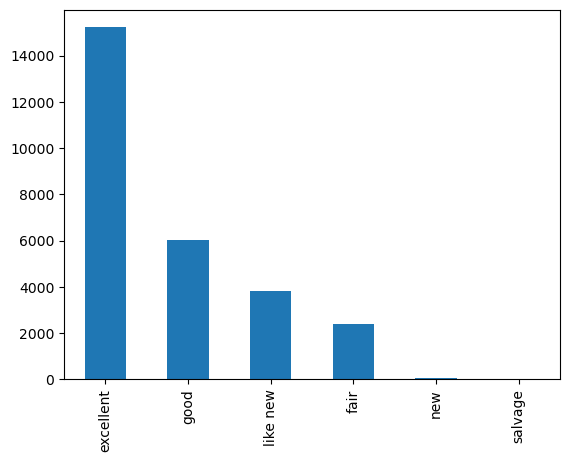

6 cylinders     11504
4 cylinders     10071
8 cylinders      5727
other              71
10 cylinders       60
5 cylinders        46
3 cylinders        31
12 cylinders       22
Name: cylinders, dtype: int64


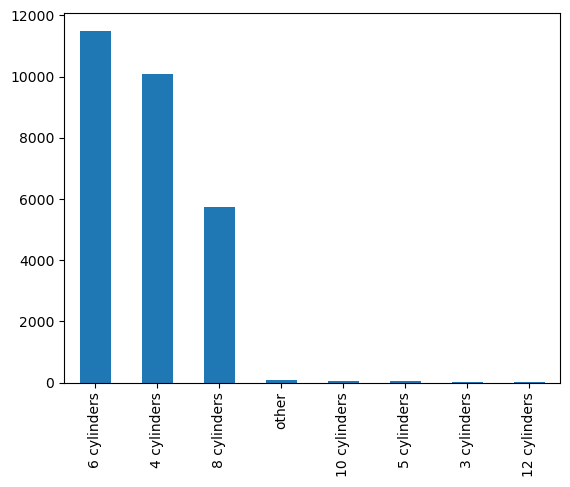

gas         23546
diesel       2639
hybrid         79
other          18
electric       11
Name: fuel, dtype: int64


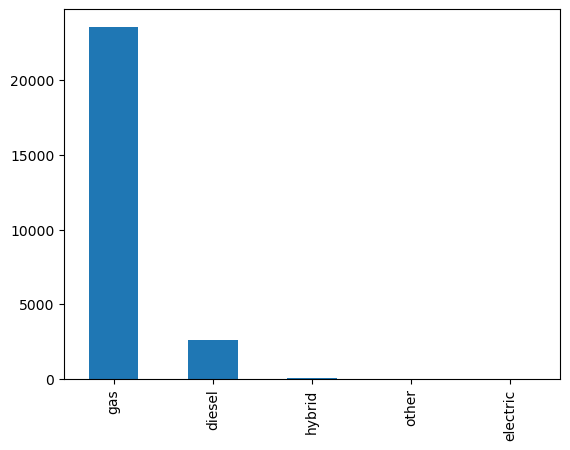

clean         22365
rebuilt        3004
salvage         985
lien            465
parts only      133
missing         124
Name: title_status, dtype: int64


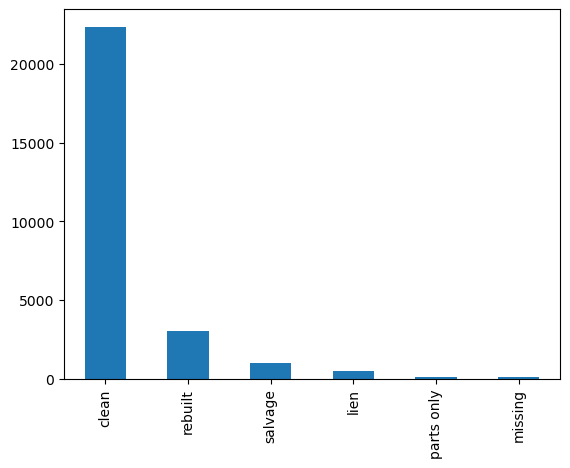

automatic    20497
manual        6156
other          879
Name: transmission, dtype: int64


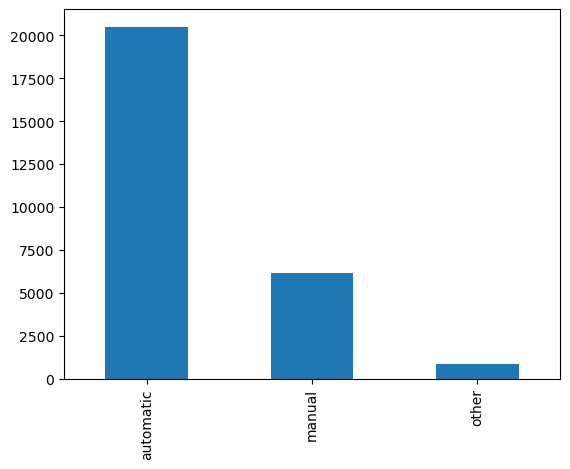

fwd    14602
4wd     8096
rwd     4834
Name: drive, dtype: int64


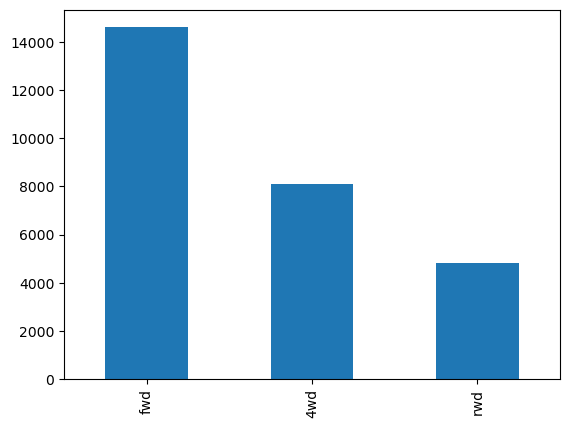

full-size      14585
mid-size        9371
compact         3352
sub-compact      132
fullーsize         42
midーsize          35
full−size          9
mid−size           5
subーcompact        1
Name: size, dtype: int64


c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


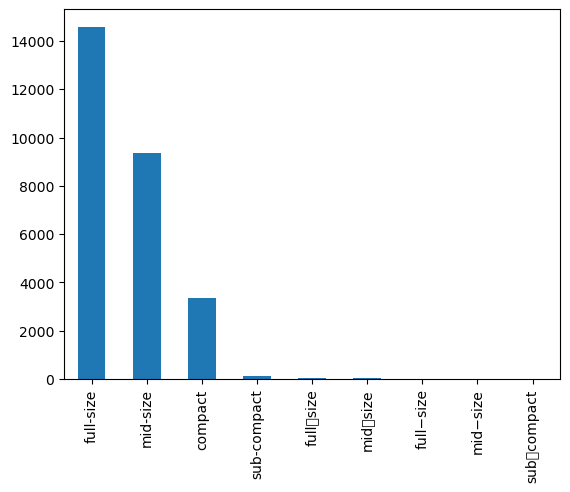

sedan          9259
SUV            7311
truck          3837
coupe          2255
pickup         2118
hatchback       665
van             537
convertible     418
mini-van        229
wagon           210
other           139
offroad          79
bus              19
Name: type, dtype: int64


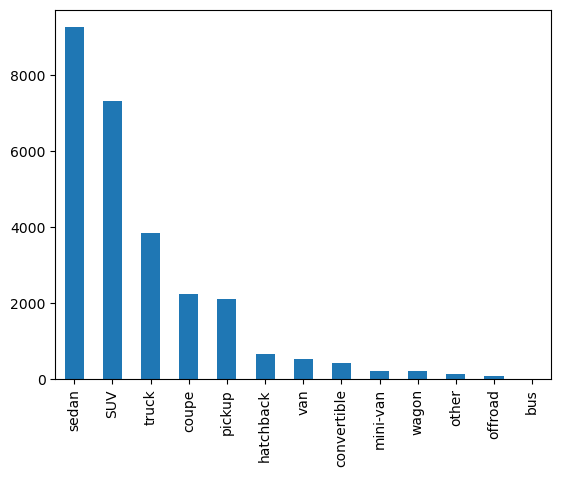

black     10143
silver     4300
blue       3765
white      3624
green      2385
red        1419
grey       1136
brown       365
custom      197
orange      144
yellow       30
purple       24
Name: paint_color, dtype: int64


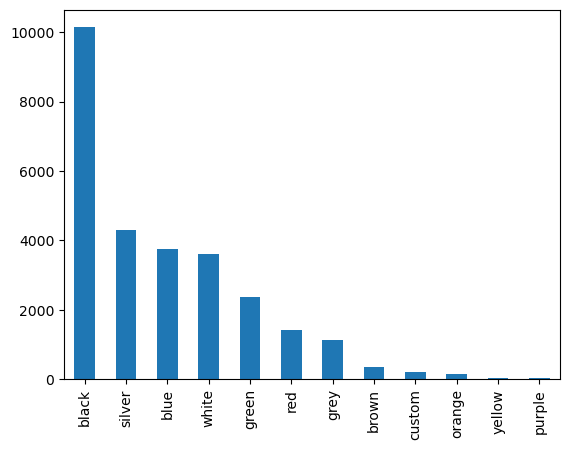

ca    2702
ny    1841
fl    1650
nj    1413
tx    1274
pa     983
oh     849
va     766
mi     739
az     706
co     705
nc     636
ri     631
wi     626
tn     595
or     577
mn     521
dc     427
id     425
il     409
ma     389
nv     369
ia     366
in     345
wa     317
nm     287
ct     278
md     274
ok     267
mo     262
ks     252
ga     251
mt     249
sc     244
ky     229
al     152
vt     138
hi     123
ne     115
ut     111
ak     108
de     101
nd      98
la      85
nh      85
sd      77
me      68
ar      37
wv      36
wy      24
ms      16
Name: state, dtype: int64


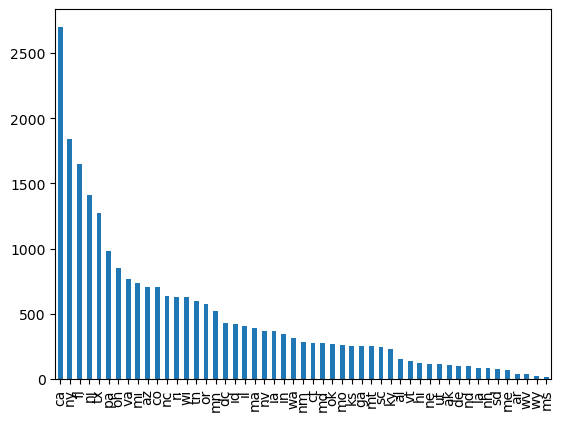

In [12]:
for col in col_categoric:
    counts = train_categoric[col].value_counts()
    print(counts)
    #棒グラフによる可視化
    counts.plot(kind='bar')
    plt.show()

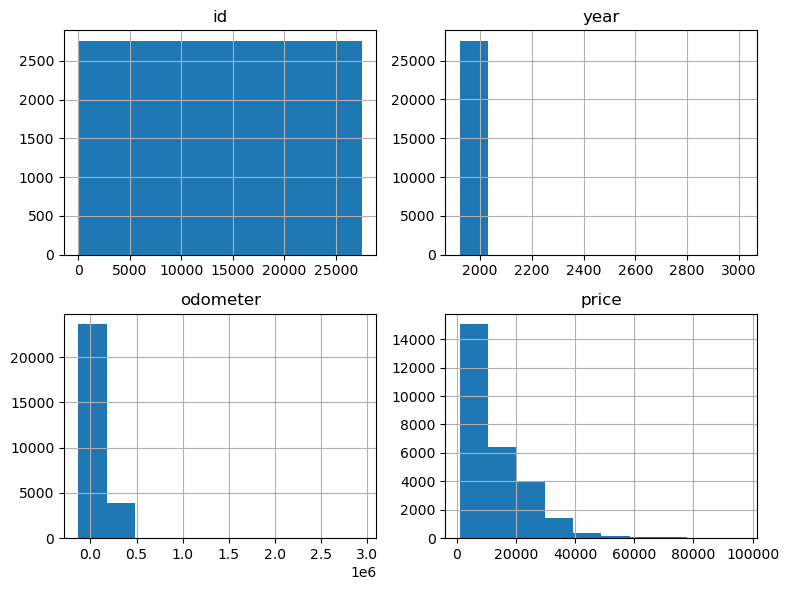

In [13]:
#数量変数のヒストグラムを表示(※figsizeオプションはグラフのサイズを指定）
train_numeric.hist(figsize=(8, 6))

# グラフのラベルが重ならないようにレイアウトを自動調整
plt.tight_layout()
plt.show()

In [24]:
train[train["year"] >=2900].head()

,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price
5766,5766,worcester / central MA,2999,ford,good,6 cylinders,gas,79452,clean,manual,rwd,full-size,SUV,red,NaN,6830
8944,8944,syracuse,3008,ford,good,6 cylinders,gas,128114,clean,manual,rwd,full-size,SUV,white,ny,1935
12008,12008,norfolk / hampton roads,3017,audi,fair,4 cylinders,NaN,123110,rebuilt,automatic,fwd,compact,sedan,silver,va,16489
23748,23748,chicago,3015,bmw,excellent,4 cylinders,gas,157422,clean,automatic,rwd,mid-size,SUV,grey,il,21028


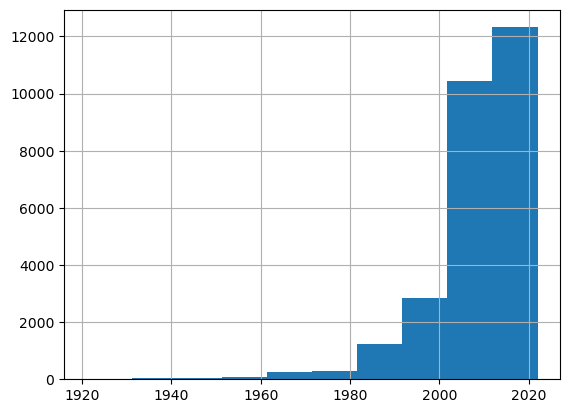

In [30]:
year = train[train["year"] <2900]["year"]
year_1 = train[train["year"] < 2900]
year.hist()
plt.show()

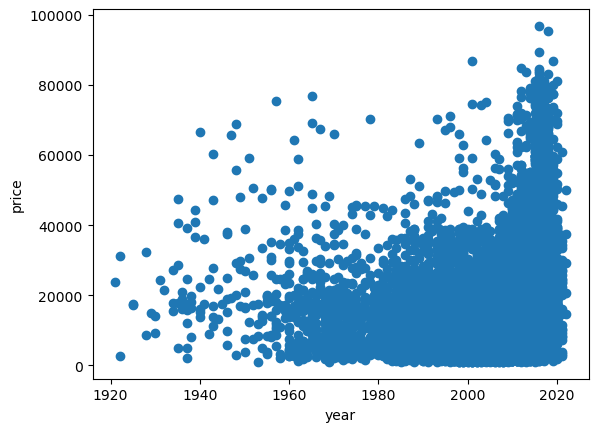

In [31]:
plt.scatter(year_1["year"], year_1["price"])
plt.xlabel("year")
plt.ylabel("price")
plt.show()

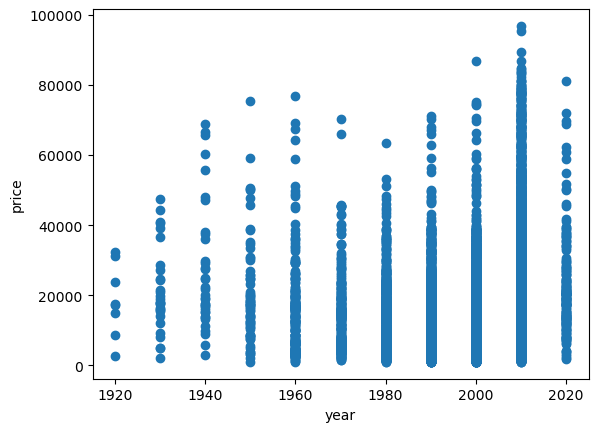

In [40]:
# yearを10ごとに区切って、一番小さい数を代表の値とする
year_1 = year_1.copy()
year_1['year'] = year_1['year'].astype(int)
year_1['year'] = year_1['year'] // 10 * 10
year_1["year"].value_counts()

C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from current font.
  plt.tight_layout()
C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.tight_layout()
C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.tight_layout()
C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from current font.
  plt.tight_layout()
C:\Users\tenbu\AppData\Local\Temp\ipykernel_21828\2924338374.py:12: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) miss

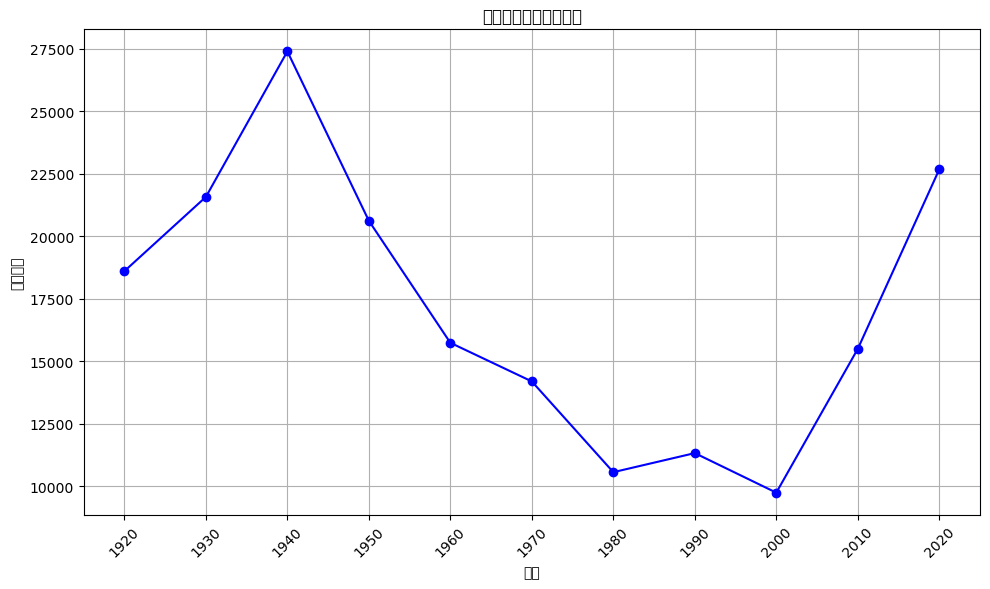

In [41]:
# 年式ごとに価格を集計する
aggregated_data = year_1.groupby('year')['price'].mean()  # 平均価格を計算


# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data.index, aggregated_data.values, marker='o', linestyle='-', color='b')
plt.title('年式ごとの価格の変化')
plt.xlabel('年式')
plt.ylabel('平均価格')
plt.xticks(aggregated_data.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:>

c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65350 (\N{FULLWIDTH LATIN SMALL LETTER F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65359 (\N{FULLWIDTH LATIN SMALL LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65362 (\N{FULLWIDTH LATIN SMALL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65348 (\N{FULLWIDTH LATIN SMALL LETTER D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tenbu\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65347 (\N{FULLWIDTH LATIN SMALL LETTER C}) missing from current font.
  fig.canvas

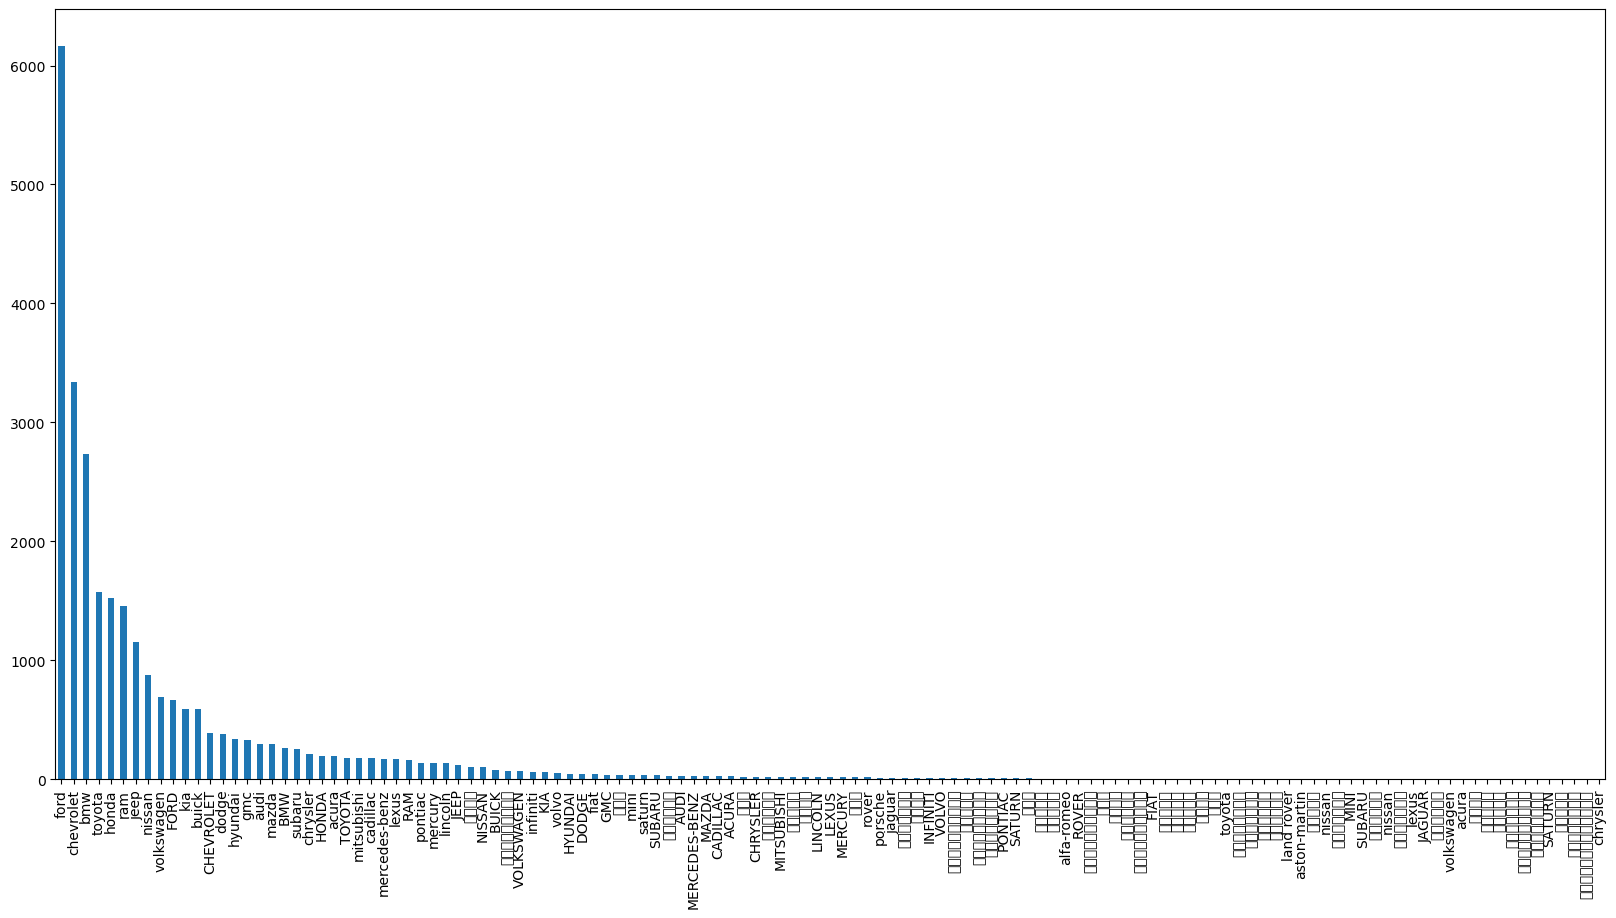

In [42]:
train["manufacturer"].value_counts().plot(kind="bar", figsize=(20, 10))

In [51]:
# 特定のカラムを小文字に変換する
year_1["manufacturer"] = year_1["manufacturer"].str.lower()

# 特定のカラム内の文字列を全て半角に変換する関数
def to_half_width(text):
    return ''.join([unicodedata.normalize('NFKC', char) for char in text])

# 特定のカラム内の文字列を半角に変換
year_1["manufacturer"] = year_1["manufacturer"].apply(to_half_width)

year_1["manufacturer"].describe()

count     27528
unique       46
top        ford
freq       6941
Name: manufacturer, dtype: object

<AxesSubplot:>

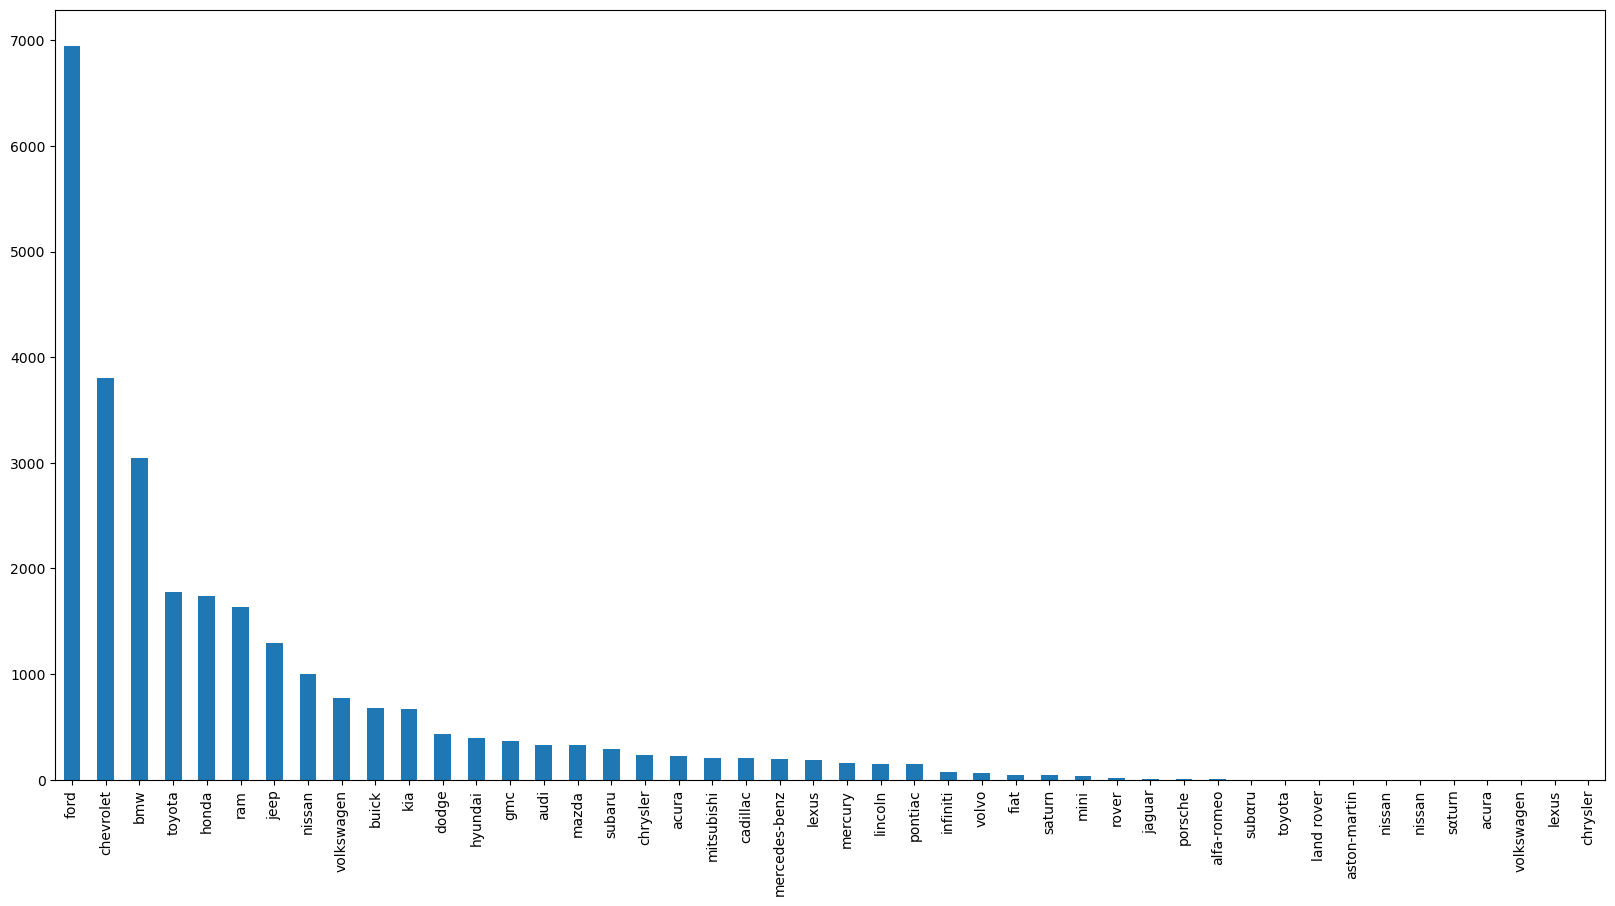

In [52]:
year_1["manufacturer"].value_counts().plot(kind="bar", figsize=(20, 10))